In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
f = "/home/matheus/Documentos/LACRIO/Analises/Cordillera Blanca/Weather Station Data/Cuchillacocha_CUCHWX_5Jul13_6Apr20.csv"
df = pd.read_csv(f, encoding="latin1")


In [9]:
# Carregar e preparar os dados (substitua pelo seu DataFrame real)
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')

# Remover duplicatas (caso existam) mantendo a primeira ocorrência
df = df.drop_duplicates(subset=['Datetime'])

# Criar o intervalo completo de datas
full_date_range = pd.date_range(start=df['Datetime'].min(), end=df['Datetime'].max(), freq='D')

# Reindexar o DataFrame para o intervalo completo de datas
df_full = df.set_index('Datetime').reindex(full_date_range)


PRECIPITAÇÃO

In [10]:
# Contador de valores ausentes para Precipitation (mm)
nan_count_precipitation = df_full['Precipitation (mm)'].isna().sum()

# Total de valores no intervalo completo de datas
total_count = df_full['Precipitation (mm)'].size

# Percentual de NaN
nan_percentage_precipitation = (nan_count_precipitation / total_count) * 100

# Exibir resultados
print(f"A quantidade de valores NaN na coluna 'Precipitation (mm)' é: {nan_count_precipitation}")
print(f"Os valores NaN representam {nan_percentage_precipitation:.2f}% do total de dados na coluna 'Precipitation (mm)'.")


A quantidade de valores NaN na coluna 'Precipitation (mm)' é: 268
Os valores NaN representam 10.86% do total de dados na coluna 'Precipitation (mm)'.


TEMPERATURA

In [11]:
# Contador de valores ausentes para Temperature (°C)
nan_count_temperature = df_full['Temperature (°C)'].isna().sum()

# Percentual de NaN para Temperature (°C)
nan_percentage_temperature = (nan_count_temperature / total_count) * 100

# Exibir resultados para Temperature (°C)
print(f"A quantidade de valores NaN na coluna 'Temperature (°C)' é: {nan_count_temperature}")
print(f"Os valores NaN representam {nan_percentage_temperature:.2f}% do total de dados na coluna 'Temperature (°C)'.")


A quantidade de valores NaN na coluna 'Temperature (°C)' é: 772
Os valores NaN representam 31.29% do total de dados na coluna 'Temperature (°C)'.


GRÁFICOS

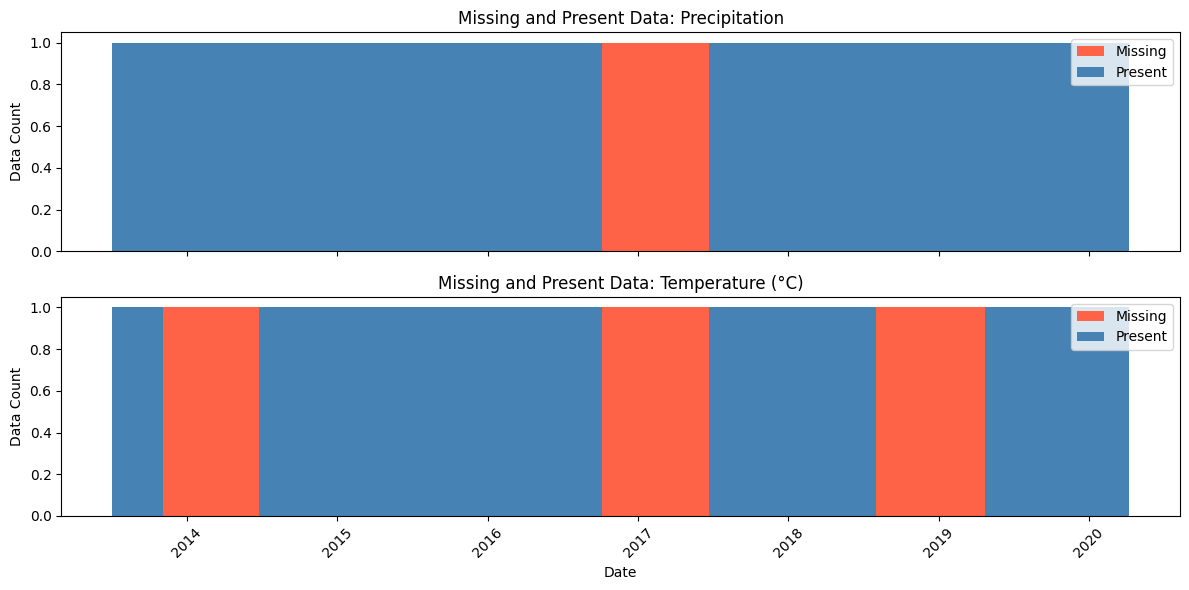

In [12]:


# Verificar as datas ausentes e presentes para Precipitation e Temperature (°C)
missing_precipitation = df_full['Precipitation (mm)'].isna()
present_precipitation = ~missing_precipitation

missing_temperature = df_full['Temperature (°C)'].isna()
present_temperature = ~missing_temperature

# Criar os gráficos
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

bar_width = 5  # Ajuste fino da largura da barra

# Gráfico para Precipitation
axes[0].bar(df_full.index[missing_precipitation], np.ones(missing_precipitation.sum()), 
            color='tomato', label='Missing', width=bar_width)  # Missing data in red
axes[0].bar(df_full.index[present_precipitation], np.ones(present_precipitation.sum()), 
            color='steelblue', label='Present', width=bar_width)  # Present data in blue
axes[0].set_title('Missing and Present Data: Precipitation')
axes[0].set_ylabel('Data Count')
axes[0].legend()

# Gráfico para Temperature (°C)
axes[1].bar(df_full.index[missing_temperature], np.ones(missing_temperature.sum()), 
            color='tomato', label='Missing', width=bar_width)  # Missing data in red
axes[1].bar(df_full.index[present_temperature], np.ones(present_temperature.sum()), 
            color='steelblue', label='Present', width=bar_width)  # Present data in blue
axes[1].set_title('Missing and Present Data: Temperature (°C)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Data Count')
axes[1].legend()

# Ajustar os ticks e layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


